In [1]:
#Load a real dataset and create a 75/25 train/test split of the dataset.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()
X = bc.data
y = bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 426
Number samples in testing: 143


In [22]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [2]:
print(bc.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
#Train a decision tree classifier. Default = gini
from sklearn.tree import DecisionTreeClassifier
#10-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True, random_state = 0)
best_score = 0
for crit in ['gini', 'entropy']:
    for i in [2, 3, 4, 5, 6, 7]:
        tree_clf = DecisionTreeClassifier(criterion = crit, max_depth = i)
        fold_accuracies = cross_val_score(tree_clf, X_train, y_train, cv = kfold)
        score = fold_accuracies.mean()
        if score > best_score:
            tree_param = {'criterion': crit, 'max_depth': i}
            best_score = score

print("Best accuracy on cross-validation: {:0.2f}".format(best_score))
print("Best parameters: {}".format(tree_param))

Best accuracy on cross-validation: 0.96
Best parameters: {'criterion': 'entropy', 'max_depth': 5}


In [5]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0
for p_val in [1, 2]:
    for i in [2, 3, 4, 5, 6, 7]:
        knn_clf = KNeighborsClassifier(n_neighbors = i, p = p_val)
        fold_accuracies = cross_val_score(knn_clf, X_train, y_train, cv = kfold)
        score = fold_accuracies.mean()
        if score > best_score:
            knn_param = {'n_neighbors': i, 'p': p_val}
            best_score = score

print("Best accuracy on cross-validation: {:0.2f}".format(best_score))
print("Best parameters: {}".format(knn_param))

Best accuracy on cross-validation: 0.94
Best parameters: {'n_neighbors': 4, 'p': 1}


In [6]:
#SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Transform scale of data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

best_score = 0
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    for d in [2, 3, 4]:
        for g in [0.001, 0.01, 0.1, 1, 10, 100]:
            svm = SVC(C = c, kernel = "poly", degree = d, gamma = g)
            fold_accuracies = cross_val_score(svm, X_train_scaled, y_train) 
            score = fold_accuracies.mean()
            if score > best_score:
                svm_param = {'C': c, 'degree': d,'gamma':g}
                best_score = score
        
print("Best accuracy on cross-validation: {:0.2f}".format(best_score))
print("Best parameters: {}".format(svm_param))

Best accuracy on cross-validation: 0.95
Best parameters: {'C': 0.01, 'degree': 3, 'gamma': 1}


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

def report (clf, clf_pred, clf_param):
    test_score = clf.score(X_test, y_test)
    test_accuracy = accuracy_score(y_test, clf_pred)
    test_precision = precision_score(y_test, clf_pred, average='micro')
    test_recall = recall_score(y_test, clf_pred, average='micro')
    print("Best parameters: {}".format(clf_param))
    print("Test set score: {:.4f}".format(test_score))
    print("Test set accuracy: {:.4f}".format(test_accuracy))
    print("Test set precison: {:.4f}".format(test_precision))
    print("Test set recall: {:.4f}".format(test_recall))
    print("Classifiaction Report:\n", classification_report(y_test, clf_pred))

In [8]:
tree_clf = DecisionTreeClassifier(**tree_param)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)

report(tree_clf, tree_pred, tree_param)

Best parameters: {'criterion': 'entropy', 'max_depth': 5}
Test set score: 0.9441
Test set accuracy: 0.9441
Test set precison: 0.9441
Test set recall: 0.9441
Classifiaction Report:
              precision    recall  f1-score   support

          0       0.89      0.96      0.93        53
          1       0.98      0.93      0.95        90

avg / total       0.95      0.94      0.94       143



In [9]:
knn_clf = KNeighborsClassifier(**knn_param)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

report(knn_clf, knn_pred, knn_param)

Best parameters: {'n_neighbors': 4, 'p': 1}
Test set score: 0.9371
Test set accuracy: 0.9371
Test set precison: 0.9371
Test set recall: 0.9371
Classifiaction Report:
              precision    recall  f1-score   support

          0       0.91      0.92      0.92        53
          1       0.96      0.94      0.95        90

avg / total       0.94      0.94      0.94       143



In [10]:
svm = SVC(**svm_param)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

report(svm, svm_pred, svm_param)

Best parameters: {'C': 0.01, 'degree': 3, 'gamma': 1}
Test set score: 0.6294
Test set accuracy: 0.6294
Test set precison: 0.6294
Test set recall: 0.6294
Classifiaction Report:
              precision    recall  f1-score   support

          0       0.00      0.00      0.00        53
          1       0.63      1.00      0.77        90

avg / total       0.40      0.63      0.49       143



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
from sklearn.naive_bayes import GaussianNB

gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
gaussian_pred = gaussian_clf.predict(X_test)

report(gaussian_clf, gaussian_pred, clf_param = 'not applicable')

Best parameters: not applicable
Test set score: 0.9371
Test set accuracy: 0.9371
Test set precison: 0.9371
Test set recall: 0.9371
Classifiaction Report:
              precision    recall  f1-score   support

          0       0.92      0.91      0.91        53
          1       0.95      0.96      0.95        90

avg / total       0.94      0.94      0.94       143



In [12]:
#Visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_confusion_matrix (y_pred):
    mat = confusion_matrix(y_pred, y_test)
    sns.heatmap(mat.T, cmap = "Blues", square = True, annot = True, fmt = 'd', cbar = False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

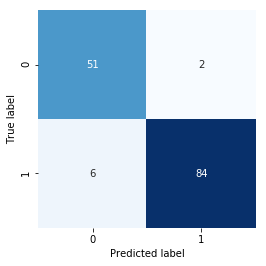

In [13]:
visualize_confusion_matrix(tree_pred)

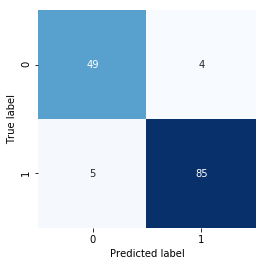

In [14]:
visualize_confusion_matrix(knn_pred)

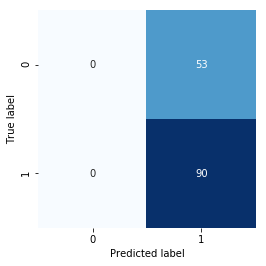

In [15]:
visualize_confusion_matrix(svm_pred)

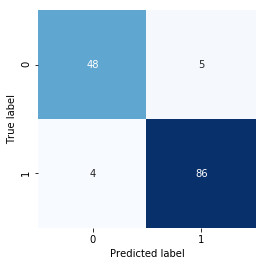

In [16]:
visualize_confusion_matrix(gaussian_pred)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(use_gridspec = True)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


def cnfMatrix (clf_pred):
    cnf_matrix = confusion_matrix(y_test, clf_pred)
    np.set_printoptions(precision=2)
    
    plt.figure(figsize = (8, 8))
    plot_confusion_matrix(cnf_matrix, classes=wine.target_names, title='Confusion matrix, without normalization')
    
    plt.figure(figsize = (8, 8))
    plot_confusion_matrix(cnf_matrix, classes=wine.target_names, normalize=True, title='Normalized confusion matrix')

    plt.show()


In [ ]:
cnfMatrix(tree_pred)

In [ ]:
cnfMatrix(knn_pred)

In [ ]:
cnfMatrix(svm_pred)

In [ ]:
cnfMatrix(gaussian_pred)